In [117]:
import numpy as np
from scipy.signal import chirp
import matplotlib.pyplot as plt
from cmath import phase

In [101]:
def chirp_modulation(SF,B,L):
    #SF: spreading factor - entier
    #B: la bande à balayer lors de la création du CS - liste de deux valeurs
    #L: le symbole à traduire en chirp signal - liste de longueur SF
    M=2**SF
    TS=M/(B[1]-B[0])
    LD=int(L,2)
    D1=np.linspace(0, TS*LD/M, num=int((B[1]-B[0])*LD*100/M))
    D2=np.linspace(TS*LD/M, TS, num=int((B[1]-B[0])*(M-LD)*100/M))
    D=np.concatenate((D1, D2), axis=None)
    S1 = chirp(D1, f0=B[0], f1=B[0]+((B[1]-B[0])*LD/M), t1=TS*LD/M, method='linear')
    S2 = chirp(D2, f0=B[0]+((B[1]-B[0])*LD/M), f1=B[1], t1=TS, method='linear')
    S=np.concatenate((S2, S1), axis=None)
    plt.figure(figsize=(60, 6))
    plt.plot(D, S)
    plt.title("Bit "+L)
    plt.xlabel('t (sec)')
    plt.show()
    return S
    

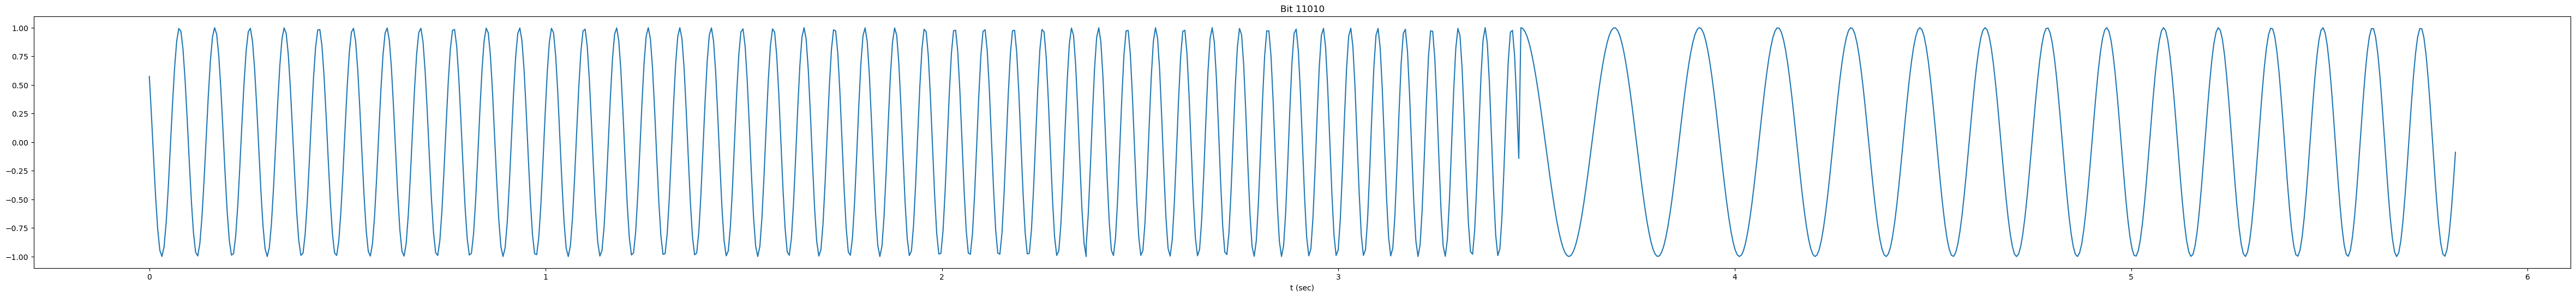

array([ 0.57352567,  0.23813245, -0.12974936, ..., -0.60824014,
       -0.36321221, -0.08913135])

In [102]:
#exemple
chirp_modulation(6,[4,15],'11010')

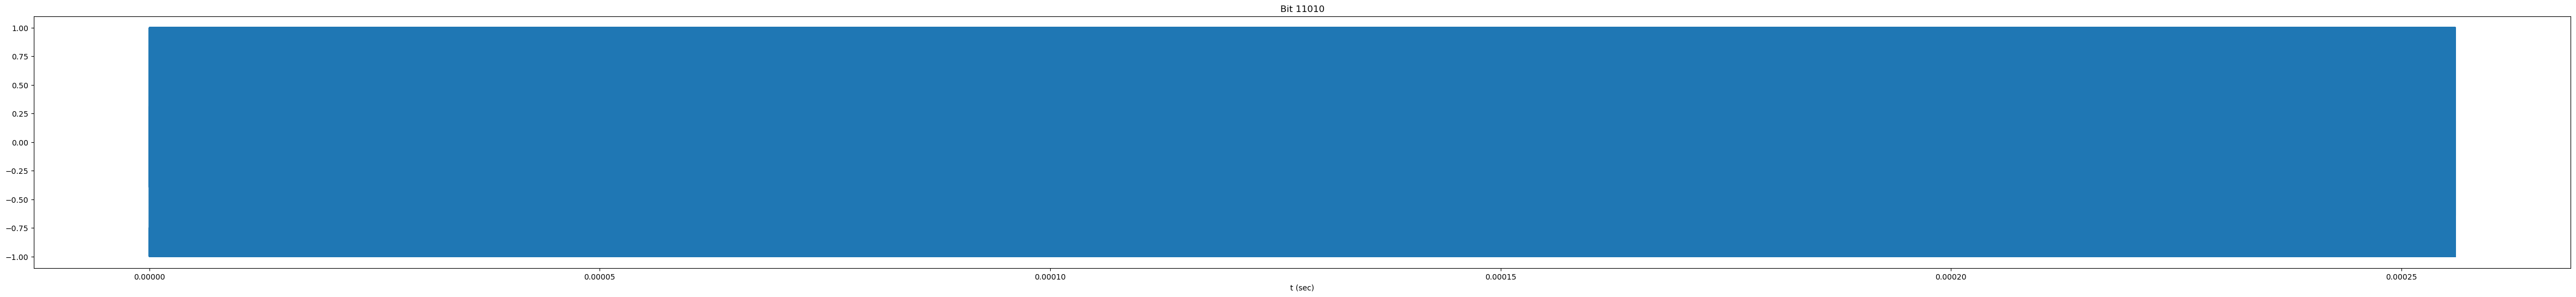

In [105]:
#transmission d'un symbole en conditions réelles
S=chirp_modulation(7,[950000000,950500000],'11010')

In [141]:
def chirp_demodulation(S):
    A=np.fft.fft(S)
    B=[phase(i) for i in A]
    return B.index(max(B)), max(B), B
    
    

In [142]:
chirp_demodulation(S)

(0,
 3.141592653589793,
 [3.141592653589793,
  3.1213422874597354,
  3.130108061025597,
  -3.1284608651691093,
  -3.1220014220118193,
  3.1394887462289987,
  3.1208815433946926,
  3.131860212518739,
  -3.126934067736117,
  -3.122853630395435,
  3.1374064240619717,
  3.1206225247107833,
  3.133701049235831,
  -3.125542222735307,
  -3.123891525373289,
  3.135367032976965,
  3.1205665112485756,
  3.1356136312676264,
  -3.1242987472926957,
  -3.125105760683929,
  3.1333913729135574,
  3.1207128137966627,
  3.137580508386824,
  -3.123215914013427,
  -3.126485074548575,
  3.1314995304321886,
  3.121058800054194,
  3.139583783519844,
  -3.122304650144771,
  -3.1280163152302083,
  3.1297105039910385,
  3.121600016696517,
  -3.141579964790155,
  -3.12157444761478,
  -3.1296846554214346,
  3.1280421618097645,
  3.122330196595521,
  -3.139558408725994,
  -3.1210332222406385,
  -3.1314736502934784,
  3.126510901950613,
  3.123241429860099,
  -3.137555121459284,
  -3.120687203986881,
  -3.133365483